In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [15]:
from sklearn.decomposition import PCA

In [7]:
from sklearn.datasets import load_digits
(data, label) = load_digits(as_frame=True, return_X_y=True)
(standarized_data, label) = load_digits(as_frame=True, return_X_y=True)

label


0       0
1       1
2       2
3       3
4       4
       ..
1792    9
1793    0
1794    8
1795    9
1796    8
Name: target, Length: 1797, dtype: int64

In [4]:
data

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [1]:
import matplotlib.image as mpimg

In [19]:
numComponents = 2
numImages = 1797
pca = PCA(n_components=numComponents)
pca.fit(data)

projected = pca.transform(data)

projected = pd.DataFrame(projected,columns=['pc1','pc2'],index=range(0,numImages))
projected['digit'] = label
projected

,pc1,pc2,digit
0,-1.259466,-21.274883,0
1,7.957611,20.768699,1
2,6.991923,9.955986,2
3,-15.906105,-3.332464,3
4,23.306867,-4.269061,4
...,...,...,...
1792,-14.606628,-13.344124,9
1793,6.464574,-20.567299,0
1794,10.801284,6.960252,8
1795,-4.872100,-12.423954,9


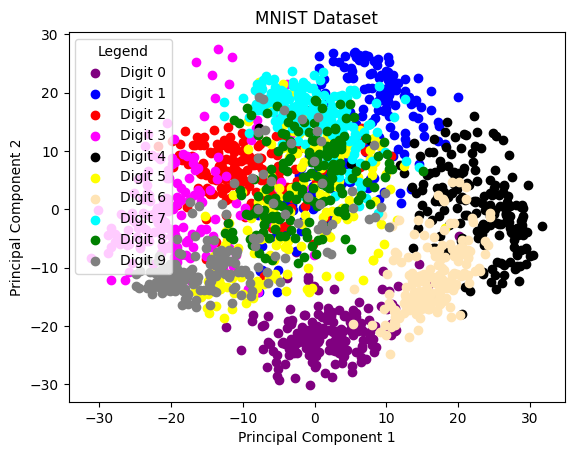

<Figure size 640x480 with 0 Axes>

In [26]:
colors = {'0':'purple' ,'1':'blue', '2':'red', '3':'magenta', '4':'black', '5':'yellow', '6':'moccasin', '7':'cyan', '8':'green', '9': 'grey'}
 

for digit in colors:
    d = projected[projected['digit']==int(digit)] 
    plt.scatter(d['pc1'],d['pc2'], c=colors[digit],label=f'Digit {digit}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('MNIST Dataset')
plt.legend(title="Legend")
plt.show()
plt.savefig('Homework3_1.png', dpi=300) 

In [159]:
M = data.to_numpy()
n, p = M.shape

In [160]:
C = np.cov(M.T, ddof = 1)

In [162]:
M1 = M.copy()
M1 = M1 - np.mean(M1, axis=0)
C1 = np.dot(M1.T, M1) / (n - 1)

In [163]:
 
print("C and C1 shall be identical")
print(f"M1:\n{M1}\nC1:\n{C1}\nC:\n{C}")

C and C1 shall be identical
M1:
[[ 0.         -0.30383973 -0.20478575 ... -6.7640512  -2.06789093
  -0.36449638]
 [ 0.         -0.30383973 -5.20478575 ...  3.2359488  -2.06789093
  -0.36449638]
 [ 0.         -0.30383973 -5.20478575 ...  9.2359488   6.93210907
  -0.36449638]
 ...
 [ 0.         -0.30383973 -4.20478575 ... -0.7640512  -2.06789093
  -0.36449638]
 [ 0.         -0.30383973 -3.20478575 ...  5.2359488  -2.06789093
  -0.36449638]
 [ 0.         -0.30383973  4.79521425 ...  5.2359488  -1.06789093
  -0.36449638]]
C1:
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.8229975   2.40099498 ... -0.1598953   0.09851423
  -0.07406182]
 [ 0.          2.40099498 22.60837352 ... -1.15544033  1.41203571
   0.72988047]
 ...
 [ 0.         -0.1598953  -1.15544033 ... 34.81734839 15.64854441
   2.87558266]
 [ 0.          0.09851423  1.41203571 ... 15.64854441 16.73258202
   4.72078588]
 [ 0.         -0.07406182  0.72988047 ...  2.87558266  4.72078588
   3

In [164]:
tot_variance = 0
for i in range(p):
    tot_variance += C[i][i]
print("Total variance ", tot_variance)

Total variance  1202.1477121607031


In [165]:
eigenvalues, eigenvectors = np.linalg.eig(C)
print("Eigenvalues: ", eigenvalues)
print("Eigenvectors: ", eigenvectors)

Eigenvalues:  [1.79006930e+02 1.63717747e+02 1.41788439e+02 1.01100375e+02
 6.95131656e+01 5.91085249e+01 5.18845391e+01 4.40151067e+01
 4.03109953e+01 3.70117984e+01 2.85190412e+01 2.73211698e+01
 2.19014881e+01 2.13243565e+01 1.76367222e+01 1.69468639e+01
 1.58513899e+01 1.50044602e+01 1.22344732e+01 1.08868593e+01
 1.06935663e+01 9.58259779e+00 9.22640260e+00 8.69036872e+00
 8.36561190e+00 7.16577961e+00 6.91973881e+00 6.19295508e+00
 5.88499123e+00 5.15586690e+00 4.49129656e+00 4.24687799e+00
 4.04743883e+00 3.94340334e+00 3.70647245e+00 3.53165306e+00
 3.08457409e+00 2.73780002e+00 2.67210896e+00 2.54170563e+00
 2.28298744e+00 1.90724229e+00 1.81716569e+00 1.68996439e+00
 1.40197220e+00 1.29221888e+00 1.15893419e+00 9.31220008e-01
 6.69850594e-01 4.86065217e-01 2.52350432e-01 9.91527944e-02
 6.31307848e-02 6.07377581e-02 3.96662297e-02 1.49505636e-02
 8.47307261e-03 3.62365957e-03 1.27705113e-03 6.61270906e-04
 4.12223305e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00]
Eigenvect

In [224]:
pca = PCA()
MTransformed = pca.fit_transform(M)
print(f"PCA() eigenvalues : {pca.explained_variance_}")
print(f'Total number of components used after PCA : {pca.n_components_}')
cumulative_variance_explained = np.cumsum(pca.explained_variance_/tot_variance*100)
print("cumulative explained variance ", cumulative_variance_explained)
twoeig = pca.explained_variance_[:2].sum()
print("if using only the first two eigenvectors: ")
print(f"variance explained: {twoeig:.3f} {twoeig/tot_variance*100:.0f}%")

PCA() eigenvalues : [1.79006930e+02 1.63717747e+02 1.41788439e+02 1.01100375e+02
 6.95131656e+01 5.91085249e+01 5.18845391e+01 4.40151067e+01
 4.03109953e+01 3.70117984e+01 2.85190412e+01 2.73211698e+01
 2.19014881e+01 2.13243565e+01 1.76367222e+01 1.69468639e+01
 1.58513899e+01 1.50044602e+01 1.22344732e+01 1.08868593e+01
 1.06935663e+01 9.58259779e+00 9.22640260e+00 8.69036872e+00
 8.36561190e+00 7.16577961e+00 6.91973881e+00 6.19295508e+00
 5.88499123e+00 5.15586690e+00 4.49129656e+00 4.24687799e+00
 4.04743883e+00 3.94340334e+00 3.70647245e+00 3.53165306e+00
 3.08457409e+00 2.73780002e+00 2.67210896e+00 2.54170563e+00
 2.28298744e+00 1.90724229e+00 1.81716569e+00 1.68996439e+00
 1.40197220e+00 1.29221888e+00 1.15893419e+00 9.31220008e-01
 6.69850594e-01 4.86065217e-01 2.52350432e-01 9.91527944e-02
 6.31307848e-02 6.07377581e-02 3.96662297e-02 1.49505636e-02
 8.47307261e-03 3.62365957e-03 1.27705113e-03 6.61270906e-04
 4.12223305e-04 1.71361503e-16 0.00000000e+00 0.00000000e+00]
Tot

Text(0, 0.5, 'Cumulative_explained_variance')

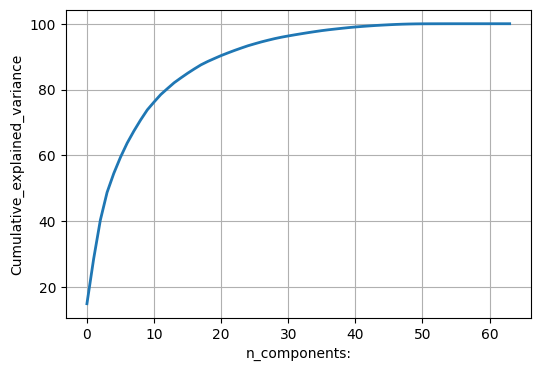

In [222]:
plt.figure(1, figsize=(6,4))
plt.clf()
plt.plot(cumulative_variance_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components:')
plt.ylabel('Cumulative_explained_variance')

In [13]:
from sklearn.preprocessing import StandardScaler

In [10]:
from sklearn.decomposition import PCA